In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import classification_report

In [8]:
aus_data = pd.read_csv('database_AUS.csv')
ind_data = pd.read_csv('database_IND.csv')
usa_data = pd.read_csv('database_USA.csv')

In [9]:
combined_data = pd.concat([aus_data, ind_data, usa_data], ignore_index=True)

In [10]:
columns_to_drop = ['wepp_id', 'estimated_generation_gwh']
cleaned_data = combined_data.drop(columns = columns_to_drop)

In [11]:
cleaned_data['primary_fuel'].fillna('Unknown', inplace=True)

In [12]:
cleaned_data.dropna(subset=['capacity_mw'], inplace=True)

In [13]:
cleaned_data['latitude'] = cleaned_data['latitude'].astype(float).fillna(cleaned_data['latitude'].mean())
cleaned_data['longitude'] = cleaned_data['longitude'].astype(float).fillna(cleaned_data['longitude'].mean())

In [14]:
cleaned_data.drop(columns=['other_fuel1', 'other_fuel2', 'other_fuel3'], inplace=True)

In [15]:
cleaned_data['commissioning_year'].fillna(-1, inplace=True)
cleaned_data['owner'].fillna('Unknown', inplace=True)

In [16]:
for col in cleaned_data.columns:
    if cleaned_data[col].dtype == 'object':
        cleaned_data[col].fillna('Unknown', inplace=True)
    else:
            cleaned_data[col].fillna(cleaned_data[col].mean(), inplace=True)

In [17]:
label_encoder = LabelEncoder()
cleaned_data['country'] = label_encoder.fit_transform(cleaned_data['country'])
cleaned_data['owner'] = label_encoder.fit_transform(cleaned_data['owner'])
cleaned_data['country_long'] = label_encoder.fit_transform(cleaned_data['country_long'])
cleaned_data['geolocation_source'] = label_encoder.fit_transform(cleaned_data['geolocation_source'].astype(str))

In [18]:
features = cleaned_data.drop(columns = ['primary_fuel', 'name', 'gppd_idnr', 'source', 'url', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'])
target = cleaned_data['primary_fuel']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [20]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Biomass       0.45      0.19      0.27        47
        Coal       0.80      0.66      0.72       124
Cogeneration       1.00      0.11      0.20         9
         Gas       0.69      0.71      0.70       414
  Geothermal       0.83      0.33      0.48        15
       Hydro       0.83      0.87      0.85       344
     Nuclear       0.25      0.22      0.24         9
         Oil       0.65      0.66      0.65       175
       Other       0.00      0.00      0.00         5
     Petcoke       0.00      0.00      0.00         2
       Solar       0.84      0.97      0.90       698
     Storage       0.71      0.17      0.28        29
     Unknown       0.99      1.00      1.00       394
       Waste       0.71      0.50      0.59       134
        Wind       0.80      0.77      0.78       260

    accuracy                           0.81      2659
   macro avg       0.64      0.48      0.51      2659
weighted avg       0.80   

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

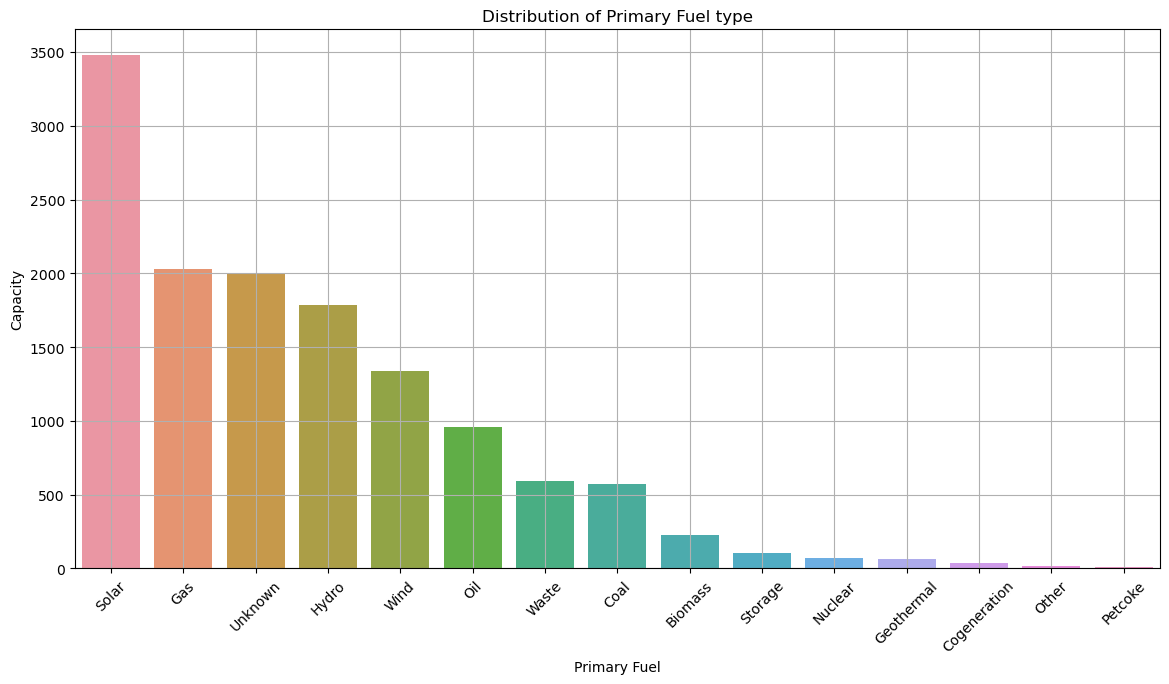

In [24]:
plt.figure(figsize=(14,7))
sns.countplot(data=cleaned_data, x='primary_fuel', order=cleaned_data['primary_fuel'].value_counts().index)
plt.title('Distribution of Primary Fuel type')
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()